In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set path to project folder
import sys
sys.path.append('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/Adv_MLA')

In [3]:
# Import the required functions or classes from the module
from src.data.datapreprocess import DataProcessor

# Create an instance of the DataProcessor class
data_processor = DataProcessor()


In [4]:
# Load the data
df_train = pd.read_csv('https://raw.githubusercontent.com/bhutanisaumya/AMLA/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/bhutanisaumya/AMLA/main/test.csv')

#explore the training data
data_processor.explore_data(df_train)

First 5 rows:
            team conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0  South Alabama   SB  26     29.5   97.3  16.6  42.5   44.43      1.6   
1       Utah St.  WAC  34     60.9  108.3  14.9  52.4   54.48      3.8   
2  South Florida   BE  27     72.0   96.2  21.8  45.7   47.98      2.1   
3     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   53.69      4.1   
4        Pacific   BW  33     56.2   96.5  22.0  52.8   54.31      8.3   

   DRB_per  ...     dgbpm    oreb    dreb    treb     ast     stl     blk  \
0      4.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462  0.0385   
1      6.3  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118  0.2353   
2      8.0  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815  0.0000   
3      9.4  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667  0.1333   
4     18.6  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545  0.3333   

       pts                             player_id  drafted  
0   3.8846  7be2ae

In [5]:
#preprocess the training data
data_processor.preprocess(df_train)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.164002,0.6154,0.613092,0.600449,0.263121,0.035676,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.422731,1.2647,1.150027,0.732357,0.299470,0.155617,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.403796,2.3333,1.494409,0.754898,0.334836,-0.000000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.431864,1.4333,1.222096,0.575551,0.374121,0.103963,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,0.633258,3.3030,1.936663,0.497036,0.321506,0.191279,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,Niagara,MAAC,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,...,-17.439600,-0.000000,0.0000,0.000000,-0.000000,-0.000000,-0.000000,0.0000,9eded9ee-0eb4-49f4-914a-f58924797bdf,0.0
56087,Northwestern St.,Slnd,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,...,9.392350,-0.000000,0.0000,0.000000,-0.000000,-0.000000,-0.000000,4.0000,5b539feb-1736-44ed-ba62-82bce86b12d6,0.0
56088,Texas Southern,SWAC,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,...,-3.240610,-0.000000,1.0000,0.722096,-0.000000,-0.000000,-0.000000,2.0000,e95d08eb-1273-4094-9173-c47368222c0d,0.0
56089,Vanderbilt,SEC,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,...,16.362500,-0.000000,0.0000,0.000000,-0.000000,-0.000000,-0.000000,3.0000,2f315a7b-2e82-44a2-8597-1779102ace09,0.0


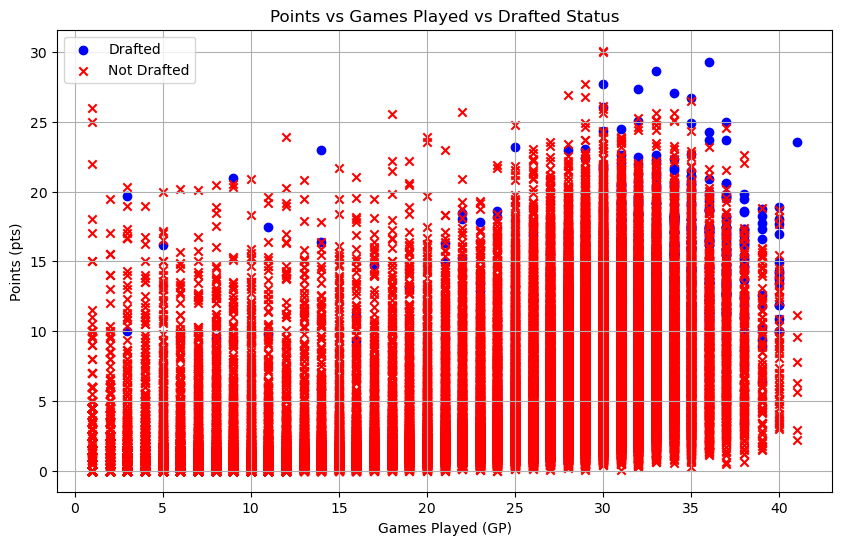

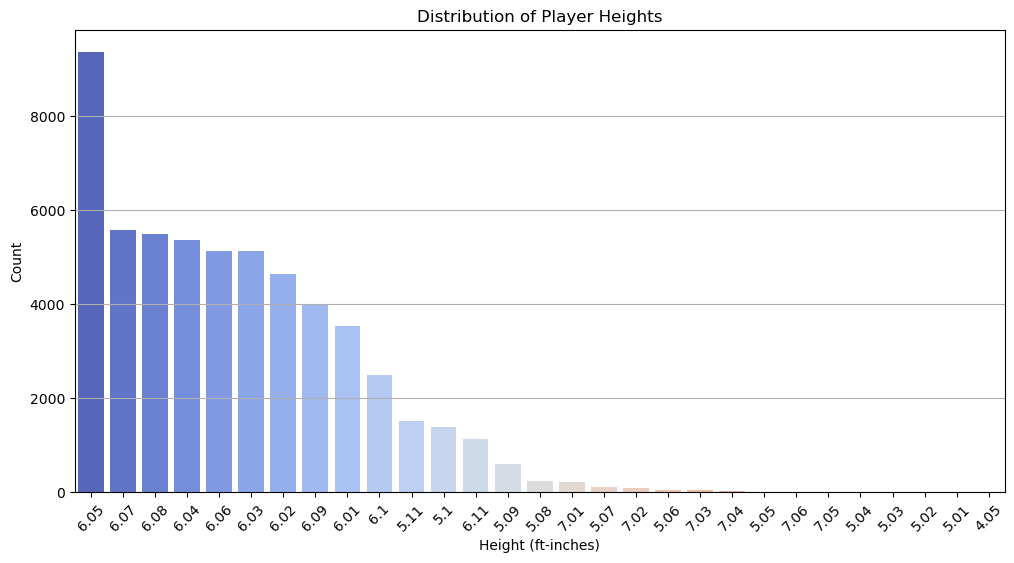

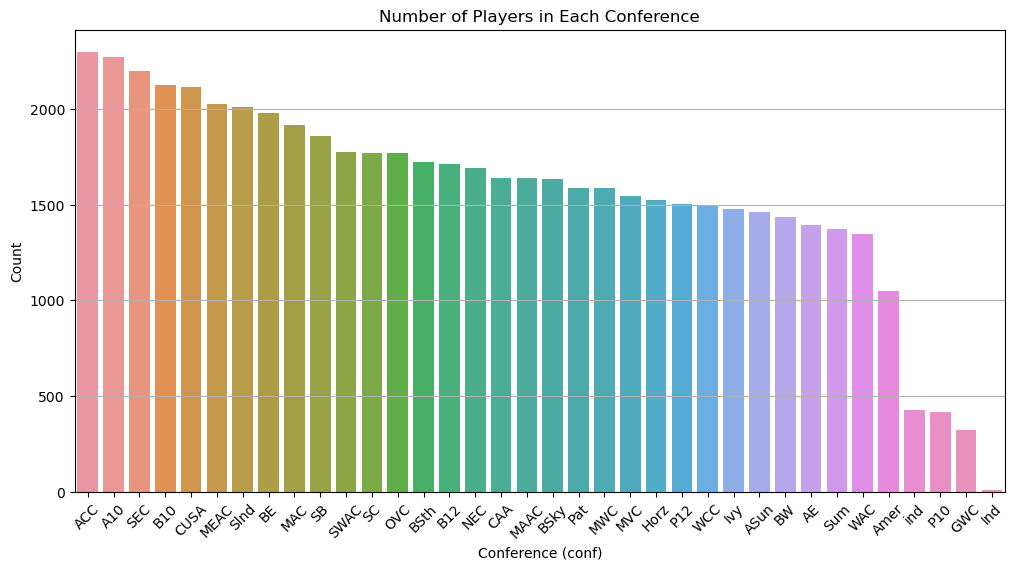

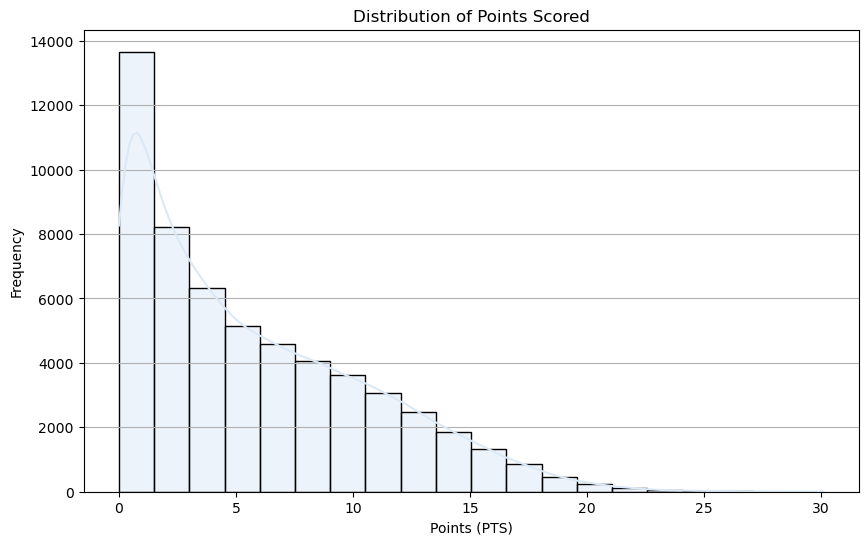

In [6]:
# Import the 'visualize_data' function from the 'src.visualization.visualize' module
from src.visualization.visualize import visualize_data

# Call the 'visualize_data' function with the 'df_train' DataFrame as input
visualize_data(df_train)


In [7]:
#explore the test data
data_processor.explore_data(df_test)

First 5 rows:
                 team  conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0          Morgan St.  MEAC   2      3.0  115.1   4.7  50.0   50.00      0.0   
1  South Carolina St.  MEAC  11     17.6   61.1  18.6  34.7   35.18      2.5   
2          Binghamton    AE   9     28.6   91.9  23.8  54.1   52.49      6.4   
3            Illinois   B10   7      1.3  111.0  10.4  83.3   83.33      0.0   
4            Iowa St.   B12  23     78.5  103.1  21.5  54.0   56.12      3.6   

   DRB_per  ...     ogbpm     dgbpm    oreb    dreb    treb     ast     stl  \
0      4.6  ... -2.467740 -2.275660  0.0000  0.3333  0.3333  0.0000  0.0000   
1     15.7  ... -7.494720 -4.412530  0.2727  1.4545  1.7273  0.4545  0.1818   
2     22.5  ... -2.924950  1.717890  1.3333  4.4444  5.7778  1.0000  0.6667   
3     13.4  ... -0.767911  0.962469  0.0000  0.2857  0.2857  0.0000  0.0000   
4     10.2  ...  2.893610 -1.019000  1.0435  2.8696  3.9130  1.1739  0.8261   

      blk      pts            

In [8]:
#preprocess the test data
data_processor.preprocess(df_test)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.489631,-2.394949,-0.000000,0.3333,0.293936,-0.000000,-0.000000,-0.000000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.622023,-4.767779,0.217757,1.4545,1.082519,0.331465,0.156780,-0.000000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.953949,1.647958,0.601487,4.4444,2.215687,0.554849,0.422644,0.309343,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.770744,0.937019,-0.000000,0.2857,0.256087,-0.000000,-0.000000,-0.000000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.865454,-1.048194,0.533745,2.8696,1.797415,0.605894,0.482257,0.073467,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,2.126178,13.881978,-0.000000,0.0000,0.000000,0.355204,0.348470,-0.000000,0.0000,a25ee55f-02a3-4f8e-8194-a5f427e14e7c
4966,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,-7.363121,-5.426423,0.203020,0.0000,0.226910,-0.000000,-0.000000,-0.000000,0.0000,d0d9f45e-7b01-44b3-8d40-514ec338611d
4967,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-3.564105,-1.161794,-0.000000,0.0000,0.000000,-0.000000,-0.000000,-0.000000,0.0000,f8df22c4-1602-4fab-896d-8820951aae2f
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-1.889823,-2.509512,-0.000000,0.0000,0.000000,-0.000000,-0.000000,-0.000000,0.0000,b791c69a-f769-4163-afda-051a6fd20a9d


<Axes: >

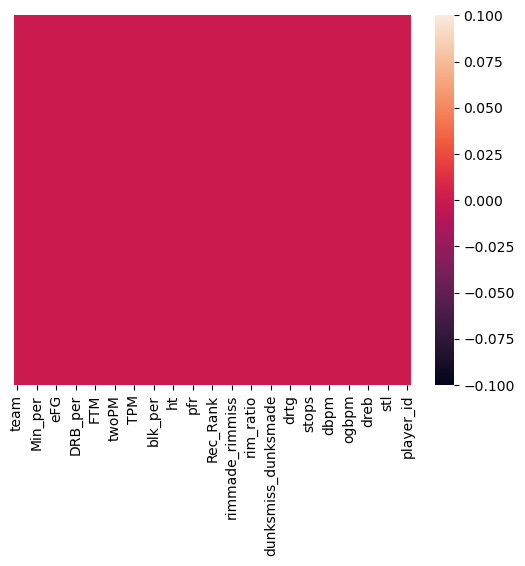

In [9]:
#heatmap highlighing null values in the test set
sns.heatmap(df_test.isnull(), yticklabels = False)

In [10]:
# Call the function to save the preprocessed data
data_processor.save_preprocessed_data(df_train, df_test)

<Axes: >

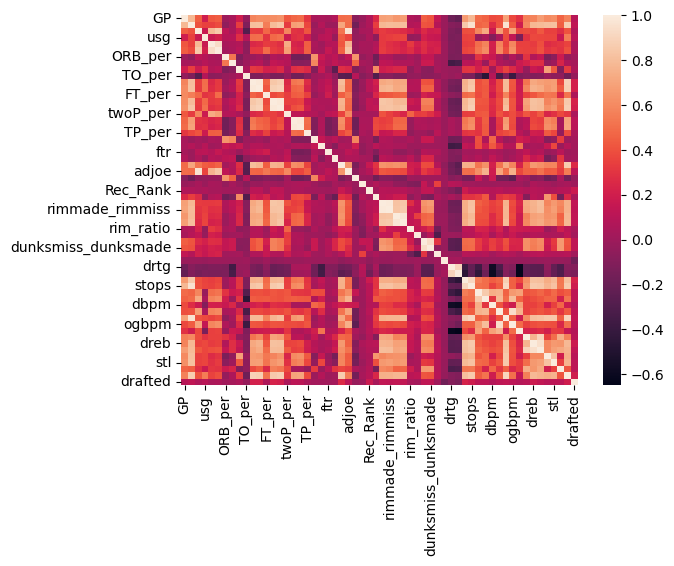

In [11]:
#correlation matrix on training set
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix)

# Feature Importance 

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
#rf_classifier.fit(X_train_scaled, y_sm)



RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
#feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importances
#feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print all the top important features
#print('Top Important Features:')
#print(feature_importance_df)

Top Important Features:
                Feature  Importance
1               dporpag    0.134251
0                porpag    0.109485
20                 gbpm    0.084444
19                  bpm    0.071579
9              Rec_Rank    0.067395
23                ogbpm    0.061088
25                adjoe    0.050939
2                 twoPM    0.050271
7                 stops    0.041205
21                 obpm    0.038851
6                   pts    0.031936
5                 twoPA    0.025053
3                   FTM    0.023215
4                   FTA    0.021079
55                adrtg    0.015304
18            dunksmade    0.012898
14                   mp    0.011743
16  dunksmiss_dunksmade    0.009514
10                 treb    0.008300
12              midmade    0.007207
34                 Ortg    0.007003
13              rimmade    0.006907
17      rimmade_rimmiss    0.006788
46              blk_per    0.006433
33                dgbpm    0.006382
54                 drtg    0.005831
8   

In [ ]:
# Get feature importances and their ranking
#importances = rf_classifier.feature_importances_
#indices = importances.argsort()[::-1]

# Create a DataFrame to display feature names and their importances
#feature_importance_df = pd.DataFrame({'Feature': X.columns[indices], 'Importance': importances[indices]})

# Print the top important features with their ranking
#print('Top Important Features (Ranked):')
#print(feature_importance_df)

Top Important Features (Ranked):
                Feature  Importance
0               dporpag    0.134251
1                porpag    0.109485
2                  gbpm    0.084444
3                   bpm    0.071579
4              Rec_Rank    0.067395
5                 ogbpm    0.061088
6                 adjoe    0.050939
7                 twoPM    0.050271
8                 stops    0.041205
9                  obpm    0.038851
10                  pts    0.031936
11                twoPA    0.025053
12                  FTM    0.023215
13                  FTA    0.021079
14                adrtg    0.015304
15            dunksmade    0.012898
16                   mp    0.011743
17  dunksmiss_dunksmade    0.009514
18                 treb    0.008300
19              midmade    0.007207
20                 Ortg    0.007003
21              rimmade    0.006907
22      rimmade_rimmiss    0.006788
23              blk_per    0.006433
24                dgbpm    0.006382
25                 drtg    0.00

In [12]:
#import necessary library
from sklearn.model_selection import train_test_split

# Extract the relevant features and target variable
features = ['Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'TO_per', 'AST_per', 'FTM', 'FTA', 'FT_per',
            'twoPM', 'twoPA', 'twoP_per', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag',
            'adjoe', 'pfr', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
            'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg',
            'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
            'ast', 'stl', 'blk', 'pts', 'ht', 'pick']
target = ['drafted']

# Extract the features and target from the DataFrame
X = df_train[features]
y = df_train[target]

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the split datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (44872, 52)
X_val shape: (11219, 52)
y_train shape: (44872, 1)
y_val shape: (11219, 1)


In [13]:
X_test = df_test[['Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'TO_per', 'AST_per', 'FTM', 'FTA', 'FT_per',
            'twoPM', 'twoPA', 'twoP_per', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag',
            'adjoe', 'pfr', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
            'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg',
            'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
            'ast', 'stl', 'blk', 'pts', 'ht', 'pick']]

# SMOTE

In [14]:
# Define the full path to the joblib file, including the directory structure
file_path = 'C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/Adv_MLA/src/models'

# Load the dictionary from the file
loaded_data = joblib.load(file_path + '/oversampled_data.joblib')

# Access the individual variables
X_sm = loaded_data['X_sm']
y_sm = loaded_data['y_sm']
X_val_sm = loaded_data['X_val_sm']
y_val_sm = loaded_data['y_val_sm']

# MinMax Scaler

In [15]:
# Load the MinMax scaler
scaler = joblib.load(file_path + '/scaler.joblib')

# Apply the scaler on all sets and save the results into separate variables
X_train_scaled = scaler.transform(X_sm)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [16]:
# Load the XGBoost model
xgboost_model = joblib.load(file_path + '/xgboost_model.joblib')

In [17]:
# Import the 'evaluate_classifier' function
from src.models.predict_model import evaluate_classifier

# Evaluate the 'xgboost_model' using scaled training and validation data
evaluate_classifier(xgboost_model, X_train_scaled, y_sm, X_val_scaled, y_val)

ROC AUC score on training set: 0.9946
ROC AUC score on validation set: 0.9594
Accuracy score on validation set: 0.9889


In [18]:
# Load the AdaBoost model
adaboost_model = joblib.load(file_path + '/adaboost_model.joblib')

In [19]:
# Evaluate the 'adaboost_model' using scaled training and validation data
evaluate_classifier(adaboost_model, X_train_scaled, y_sm, X_val_scaled, y_val)

ROC AUC score on training set: 0.9953
ROC AUC score on validation set: 0.9352
Accuracy score on validation set: 0.9906


In [20]:
# Load the Gradient boost model
gb_model = joblib.load(file_path + '/gb_model.joblib')

In [21]:
# Evaluate the 'gb_model' using scaled training and validation data
evaluate_classifier(gb_model, X_train_scaled, y_sm, X_val_scaled, y_val)

ROC AUC score on training set: 0.9927
ROC AUC score on validation set: 0.9676
Accuracy score on validation set: 0.9855


Gradient Boost model performs  well with high ROC AUC and accuracy scores on both the training and validation sets, demonstrating its effectiveness in predicting drafted NBA players.
ROC AUC score = 0.9676 (validation set) is highest among the three models.
Thus, this is the best model.

In [22]:
#Test Data
# Predict positive class 1 probabilities for the test data
#y_pred_proba_test_gb = gb_model.predict_proba(X_test_scaled)[:, 1]


# Print the predicted positive class probabilities
#print(y_pred_proba_test_gb)

In [23]:
# Adding the 'drafted' column to df_test_clean
#df_test_clean['drafted'] = y_pred_proba_test_gb

# Creating the output DataFrame with 'player_id' and 'drafted' columns
#output = df_test_clean[['player_id', 'drafted']]

# Save the output DataFrame to a CSV file
#output.to_csv('week4_submission_gb.csv', index=False)

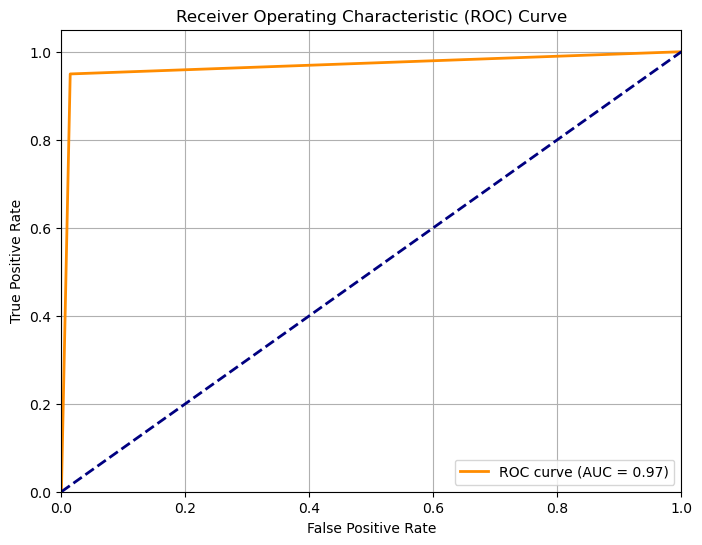

In [24]:
#ROC curve on validation set for Gradient boost model

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate ROC curve
y_pred_val_gb = gb_model.predict(X_val_scaled)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_gb)

# Calculate AUC
roc_auc = roc_auc_score(y_val, y_pred_val_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A score of 0.97 suggests that the model's predictions on the validation set are generally accurate, and it has a strong ability to separate the positive and negative classes.